### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

### Reading linkedIn job application data

In [2]:
job_application_data = pd.read_csv("sample_data.csv")
job_application_data.head()

,Application Date,Contact Email,Contact Phone Number,Company Name,Job Title,Job Url,Resume Name,Question And Answers
0,"01/02/23, 12:00 AM",NaN,NaN,Company A,Job Title 15,NaN,NaN,NaN
1,"01/02/23, 12:00 AM",NaN,NaN,Company G,Job Title 6,NaN,NaN,NaN
2,"01/02/23, 12:00 AM",NaN,NaN,Company P,Job Title 8,NaN,NaN,NaN
3,"01/02/23, 12:00 AM",NaN,NaN,Company L,Job Title 9,NaN,NaN,NaN
4,"01/05/22, 12:00 AM",NaN,NaN,Company D,Job Title 7,NaN,NaN,NaN


### Data processing steps

In [3]:
# Data Processing Function for LinkedIn Job Application Data
def process_linkedin_job_app_data(data):
    # Droping sensitive data
    data = data[['Application Date', 'Company Name', 'Job Title']]
    # Droping duplicate rows
    data = data.drop_duplicates(keep='first')
    # Splitting the date and time column into separate columns
    split_df = data['Application Date'].str.split(' ', expand=True)
    # Assigning new column names
    split_df.columns = ['Date', 'Time', 'AM/PM']
    # Replacing missing or null values with NaN
    split_df = split_df.replace('', pd.NA)
    # Concatenating the split DataFrame with the original DataFrame
    data = pd.concat([data, split_df], axis=1)
    # Droping the 'Application Date', 'Time' and 'AM/PM' columns in place
    data = data.drop(columns=['Application Date', 'Time', 'AM/PM'])
    # Converting the 'Date' column to a datetime data type
    data['Date'] = pd.to_datetime(data['Date'])
    # Droping the index column from the DataFrame
    data = data.reset_index(drop=True)
    # Extracting weekday, month and year from Date into separate columns
    data['Weekday'] = data['Date'].dt.weekday
    data['Month'] = data['Date'].dt.strftime('%B')
    data['Year'] = data['Date'].dt.year
    # Returning the DataFrame
    return data

In [4]:
# Precessing the data
job_application_data_processed = process_linkedin_job_app_data(job_application_data)
job_application_data_processed.head()

,Company Name,Job Title,Date,Weekday,Month,Year
0,Company A,Job Title 15,2023-01-02,0,January,2023
1,Company G,Job Title 6,2023-01-02,0,January,2023
2,Company P,Job Title 8,2023-01-02,0,January,2023
3,Company L,Job Title 9,2023-01-02,0,January,2023
4,Company D,Job Title 7,2022-01-05,2,January,2022


### Data insights and visualization

In [5]:
# Exploring KPI

# Calculating the total number of jobs applied
total_jobs_applied = len(job_application_data_processed)

#Total number of jobs applied
print('Total', total_jobs_applied, 'jobs applied')

#------------------------------------------------------------------------------------------------------------------------

# Calculating the number of unique companies applied
unique_companies_applied = len(job_application_data_processed['Company Name'].unique())
print('Total', unique_companies_applied, 'unique companies applied')

#------------------------------------------------------------------------------------------------------------------------

# Calculating the number of days over which the jobs were applied
num_days = (job_application_data_processed['Date'].max() - job_application_data_processed['Date'].min()).days + 1

# Calculating the average jobs applied per day
applications_per_day = total_jobs_applied // num_days
print('Average', applications_per_day, 'applications per day')

# Calculating the average jobs applied per week
applications_per_week = total_jobs_applied // (num_days // 7)
print('Average', applications_per_week, 'applications per week')

# Calculating the average jobs applied per month
applications_per_month = total_jobs_applied // (num_days // 30)
print('Average', applications_per_month, 'applications per month')

Total 622 jobs applied
Total 20 unique companies applied
Average 0 applications per day
Average 5 applications per week
Average 25 applications per month


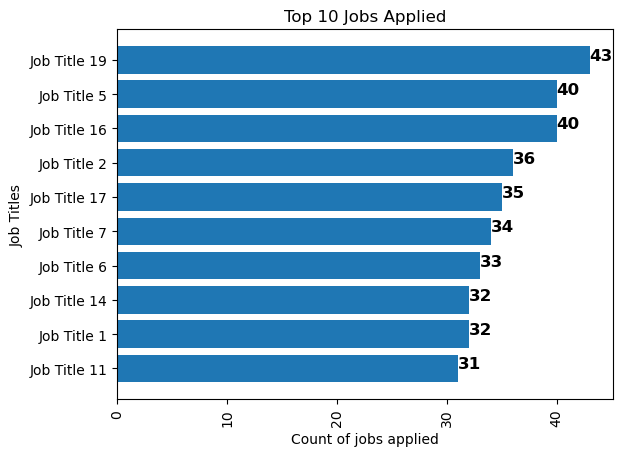

In [6]:
# Grouping the data by job title and counting the number of occurrences
jobs_applied = job_application_data_processed.groupby('Job Title').size().reset_index(name='count')
# Sorting the data by count in descending order and selecting the top 10 rows
top_jobs_applied = jobs_applied.sort_values("count", ascending=False).head(10)
# Sorting the top jobs by count in descending order
top_jobs_applied = top_jobs_applied.sort_values("count", ascending=True)

# Ploting the top jobs applied in a vertical bar chart
plt.barh(top_jobs_applied['Job Title'], top_jobs_applied['count'])
plt.title("Top 10 Jobs Applied")
plt.xticks(rotation = 90)
plt.xlabel('Count of jobs applied')
plt.ylabel('Job Titles')
# Adding labels to the bars
for i, v in enumerate(top_jobs_applied["count"]):
    plt.text(v + 0, i, str(v), color="black", fontweight="bold", fontsize=12)

plt.show()

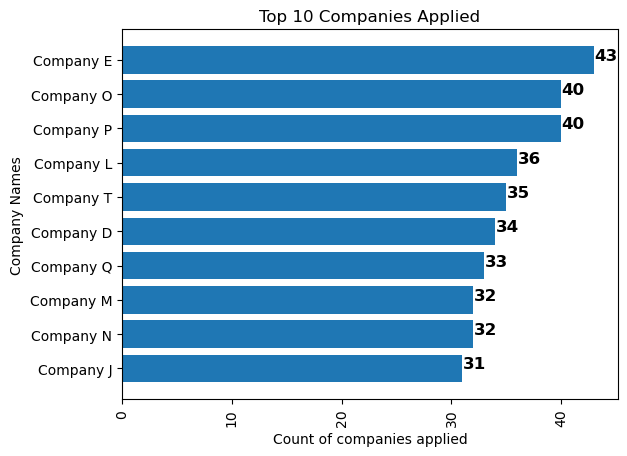

In [7]:
# Grouping the data by company name and counting the number of occurrences
companies_applied = job_application_data_processed.groupby('Company Name').size().reset_index(name='count')
# Sorting the data by count in descending order and selecting the top 10 rows
top_companies_applied = companies_applied.sort_values("count", ascending=False).head(10)
# Sorting the top companies by count in descending order
top_companies_applied = top_companies_applied.sort_values("count", ascending=True)

# Ploting the top companies applied in a vertical bar chart
plt.barh(top_companies_applied['Company Name'], top_jobs_applied['count'])
plt.title("Top 10 Companies Applied")
plt.xticks(rotation = 90)
plt.xlabel('Count of companies applied')
plt.ylabel('Company Names')
# Adding labels to the bars
for i, v in enumerate(top_jobs_applied["count"]):
    plt.text(v + 0, i, str(v), color="black", fontweight="bold", fontsize=12)

plt.show()

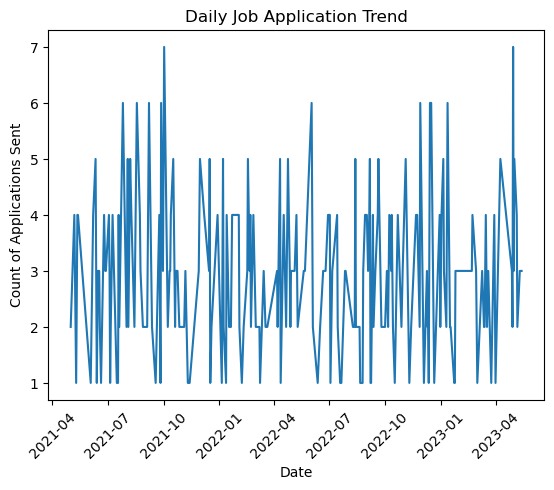

In [8]:
# Grouping the DataFrame by the date column and counting the number of applications for each day
daily_jobs_applied = job_application_data_processed.groupby('Date').size().reset_index(name='count')

# Plotting the data using a line chart
plt.plot(daily_jobs_applied['Date'], daily_jobs_applied['count'])
plt.xlabel('Date')
plt.ylabel('Count of Applications Sent')
plt.title('Daily Job Application Trend')
plt.xticks(rotation=45)
plt.show()

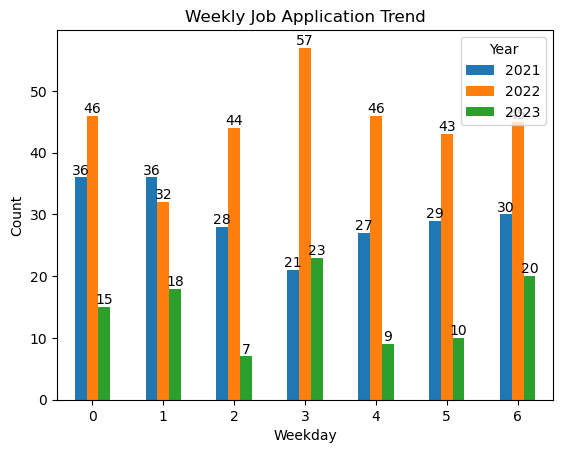

In [9]:
# Grouping the DataFrame by the year and weekday columns and counting the number of applications for each weekday
weekly_jobs_applied = job_application_data_processed.groupby(['Year', 'Weekday'])['Date'].count().reset_index()
weekly_jobs_applied = weekly_jobs_applied.rename(columns={'Date': 'Count'})

# Pivot the data to have separate columns for each year
pivot_table = weekly_jobs_applied.pivot(index='Weekday', columns='Year', values='Count')

# Plotting the data using a bar chart
ax = pivot_table.plot(kind='bar', rot=0)
plt.title('Weekly Job Application Trend')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Year')

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

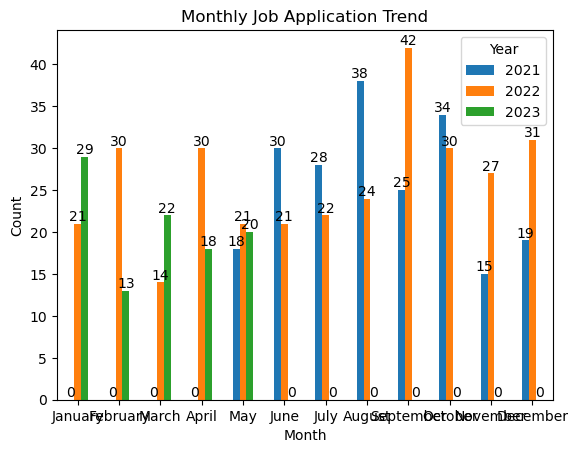

In [10]:
# Grouping the DataFrame by the year and month columns and counting the number of applications for each month
monthly_jobs_applied = job_application_data_processed.groupby(['Year', 'Month'])['Date'].count().reset_index()
monthly_jobs_applied = monthly_jobs_applied.rename(columns={'Date': 'Count'})

# Sort the DataFrame by month
monthly_jobs_applied['Month'] = pd.Categorical(monthly_jobs_applied['Month'], categories=calendar.month_name[1:], ordered=True)
monthly_jobs_applied = monthly_jobs_applied.sort_values('Month')

# Pivot the data to have separate columns for each year
pivot_table = monthly_jobs_applied.pivot(index='Month', columns='Year', values='Count')

# Plotting the data using a bar chart
ax = pivot_table.plot(kind='bar', rot=0)
plt.title('Monthly Job Application Trend')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Year')

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.show()